In [1]:
import pandas as pd
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import NormalIndPower
import matplotlib.pyplot as plt

In [2]:
import scanpy as sc

In [42]:
adat = sc.read("/rds/general/user/tf424/home/97/umap_oligo/markers_0.1/pmc_oligo_umap_v3.h5ad")

In [43]:
print(adat.obs.columns.tolist())

['sample_id', 'participant_id', 'cell_type', 'brain_region', 'sex', 'path_braak_nft', 'path_braak_lb', 'diagnosis_at_baseline', 'diagnosis_latest', 'case_control_other_at_baseline', 'case_control_other_latest', 'study', 'study_participant_id', 'diagnosis', 'leiden_res_0.20', 'leiden_res_0.30', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.60', 'leiden_res_0.70', 'leiden_res_0.10', 'leiden_res_0.12', 'leiden_res_0.14']


In [3]:
# === Sample sizes ===
n_PD = 66
n_HC = 21
alpha = 0.05
analysis = NormalIndPower()

# === Proportions per cell type ===
clusters = {
    "Oligo 1": (0.151232, 0.187939),
    "Oligo 2": (0.826616, 0.778648),
    "Oligo 3": (0.017457, 0.015146),
    "Oligo 4": (0.004695, 0.018267),
}

In [4]:
# === Power analysis ===
analysis = NormalIndPower()
results = []

for cell_type, (p1, p2) in clusters.items():
    # Calculate Cohen's h (effect size)
    h = proportion_effectsize(p1, p2)
    
    # Calculate power
    power = analysis.power(effect_size=h, nobs1=n_PD, alpha=alpha, ratio=n_HC / n_PD)
    
    # Calculate required sample size (per group) for 80% power
    required_n = NormalIndPower().solve_power(
        effect_size=h,
        power=0.8,
        alpha=0.05,
        ratio=1.0  # Equal group sizes
    )
    
    # Append the results
    results.append({
        "Cell Type": cell_type,
        "PD Proportion": p1,
        "HC Proportion": p2,
        "Delta": abs(p1 - p2),
        "Cohen's h": h,
        "Power (α = 0.05)": power,
        "Required Sample Size (per group)": round(required_n)
    })

In [5]:
# === Export results ===
df = pd.DataFrame(results)
df = df.round(6)
print(df.to_string(index=False))

Cell Type  PD Proportion  HC Proportion    Delta  Cohen's h  Power (α = 0.05)  Required Sample Size (per group)
  Oligo 1       0.151232       0.187939 0.036707  -0.097946          0.067685                              1636
  Oligo 2       0.826616       0.778648 0.047968   0.120720          0.076994                              1077
  Oligo 3       0.017457       0.015146 0.002311   0.018261          0.050609                             47074
  Oligo 4       0.004695       0.018267 0.013572  -0.133993          0.083359                               874


In [7]:
df.to_csv("celltype_power_statsmodels_oligo.csv", index=False)
print("✅ Power analysis complete. File saved as: celltype_power_statsmodels_oligo.csv")

✅ Power analysis complete. File saved as: celltype_power_statsmodels_oligo.csv


In [8]:
from statsmodels.stats.proportion import proportion_effectsize

In [9]:
import numpy as np

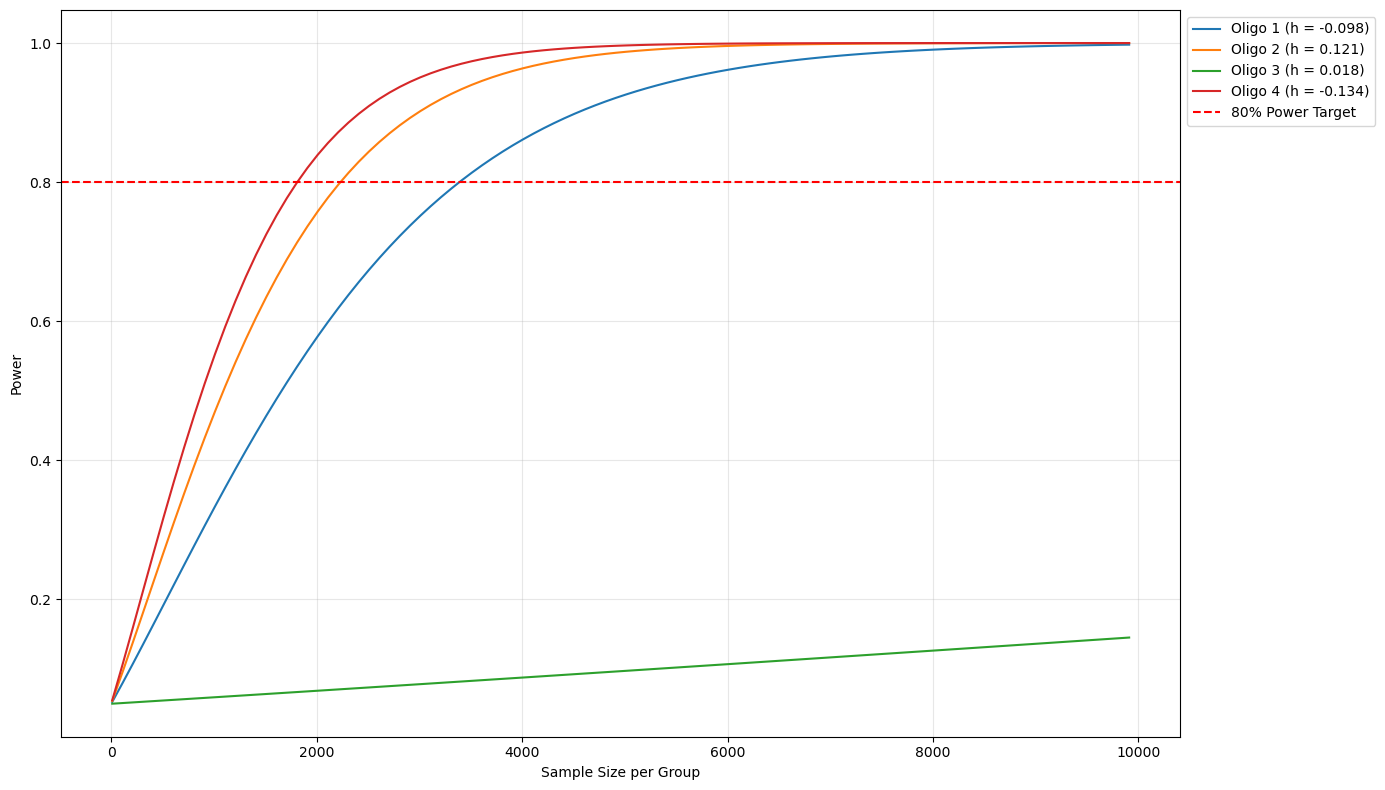

In [10]:
# === Create Power Curves for Each Cell Type ===
sample_sizes = np.arange(10, 10000, 100)
plt.figure(figsize=(12, 8))

for cell_type, (p1, p2) in clusters.items():
    h = proportion_effectsize(p1, p2)  # Cohen's h (effect size)
    
    # Calculate power for each sample size
    power_values = []
    for sample_size in sample_sizes:
        power = analysis.power(effect_size=h, nobs1=sample_size, alpha=alpha, ratio=n_HC / n_PD)
        power_values.append(power)
    
    # Plot the power curve
    plt.plot(sample_sizes, power_values, label=f"{cell_type} (h = {h:.3f})")

# === Customize Plot ===
plt.axhline(0.8, color="red", linestyle="--", label="80% Power Target")
plt.xlabel("Sample Size per Group")
plt.ylabel("Power")
plt.title("")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()

In [34]:
from statsmodels.stats.power import TTestIndPower

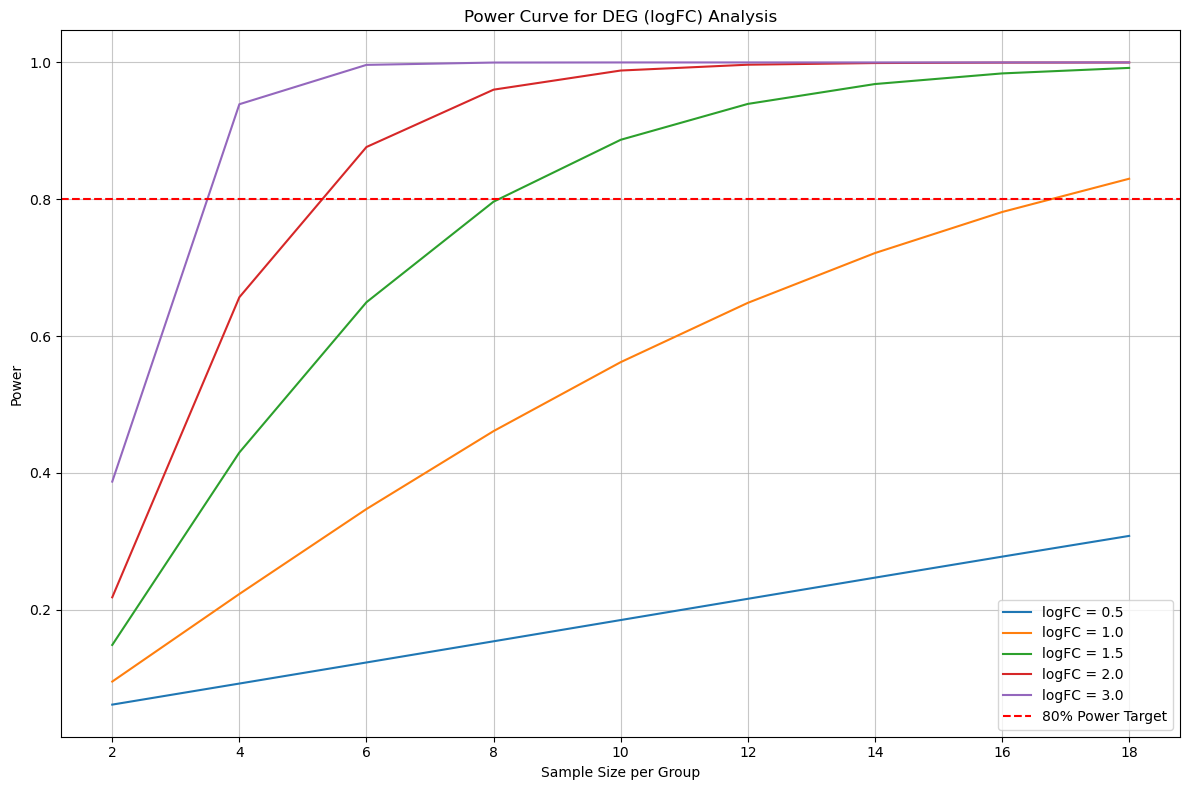

In [39]:
# === Power Analysis Parameters ===
alpha = 0.05  # Significance level
analysis = TTestIndPower()

# === Create a list of sample sizes for plotting power curve ===
sample_sizes = np.arange(2, 20, 2)  # Sample sizes from 10 to 200 (step 10)

# === Log2 Fold Changes (logFC) for DEG (simulating data) ===
logFC_values = [0.5, 1.0, 1.5, 2.0, 3.0]  # Small, medium, and large effects

# === Create Power Curves for Each logFC ===
plt.figure(figsize=(12, 8))

for logFC in logFC_values:
    # Calculate Cohen's d (effect size) from logFC (assuming pooled standard deviation is 1)
    d = logFC  # This is a simplification assuming standard deviation = 1
    
    # Calculate power for each sample size
    power_values = []
    for sample_size in sample_sizes:
        power = analysis.power(effect_size=d, nobs1=sample_size, alpha=alpha)
        power_values.append(power)
    
    # Plot the power curve for this logFC value
    plt.plot(sample_sizes, power_values, label=f"logFC = {logFC}")

# === Customize Plot ===
plt.axhline(0.8, color="red", linestyle="--", label="80% Power Target")
plt.xlabel("Sample Size per Group")
plt.ylabel("Power")
plt.title("Power Curve for DEG (logFC) Analysis")
plt.legend()
plt.grid(True, alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()
